# CS/CE 457/464 - Homework Assignment 4: SQL 
## Muhammad Areeb Kazmi
## mk07202@st.habib.edu.pk

In [2]:
import psycopg2
import pandas as pd
import pandas.io.sql as psql

In [22]:
conn = psycopg2.connect(
    host="localhost",
    database="HW4",
    user="postgres",
    password="123")

In [24]:
# create a cursor
cur = conn.cursor()

# execute a statement
print('PostgreSQL database version:')
cur.execute('SELECT version()')

# display the PostgreSQL database server version
db_version = cur.fetchone()
print(db_version)

PostgreSQL database version:
('PostgreSQL 17rc1 on x86_64-windows, compiled by msvc-19.41.34120, 64-bit',)


In [26]:
# Fetch result
cur.execute("SELECT * from countries")
record = cur.fetchall()

In [28]:
record

[(1,
  'af',
  'Afghanistan',
  'Asia',
  'Southern Asia',
  652230,
  652230,
  0,
  32564342,
  2.32,
  38.57,
  13.89,
  1.51),
 (2,
  'al',
  'Albania',
  'Europe',
  'Southern Europe',
  28748,
  27398,
  1350,
  3029278,
  0.3,
  12.92,
  6.58,
  3.3),
 (3,
  'ag',
  'Algeria',
  'Africa',
  'Northern Africa',
  2381741,
  2381741,
  0,
  39542166,
  1.84,
  23.67,
  4.31,
  0.92),
 (4,
  'an',
  'Andorra',
  'Europe',
  'Southern Europe',
  468,
  468,
  0,
  85580,
  0.12,
  8.13,
  6.96,
  0.0),
 (5,
  'ao',
  'Angola',
  'Africa',
  'Sub-Saharan Africa',
  1246700,
  1246700,
  0,
  19625353,
  2.78,
  38.78,
  11.49,
  0.46),
 (6,
  'ac',
  'Antigua and Barbuda',
  'Americas',
  'Latin America and the Caribbean',
  442,
  442,
  0,
  92436,
  1.24,
  15.85,
  5.69,
  2.21),
 (7,
  'ar',
  'Argentina',
  'Americas',
  'Latin America and the Caribbean',
  2780400,
  2736690,
  43710,
  43431886,
  0.93,
  16.64,
  7.33,
  0.0),
 (8,
  'am',
  'Armenia',
  'Asia',
  'Western As

In [30]:
df = pd.DataFrame(record)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,af,Afghanistan,Asia,Southern Asia,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,Europe,Southern Europe,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,Africa,Northern Africa,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,Europe,Southern Europe,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,Africa,Sub-Saharan Africa,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [52]:
df2 = psql.read_sql('SELECT * FROM countries', conn)

C:\Users\mlibr\AppData\Local\Temp\ipykernel_9656\1773679535.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = psql.read_sql('SELECT * FROM countries', conn)


In [54]:
df2.head()

,fact_id,country_code,country_name,country_region,country_sub_region,country_area,country_area_land,country_area_water,country_population,country_population_growth,country_birth_rate,country_death_rate,country_migration_rate
0,1,af,Afghanistan,Asia,Southern Asia,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,Europe,Southern Europe,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,Africa,Northern Africa,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,Europe,Southern Europe,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,Africa,Sub-Saharan Africa,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [46]:
# Fetch result
cur.execute("SELECT * from cities")
record = cur.fetchall()

In [50]:
df3 = psql.read_sql('SELECT * FROM cities', conn)

C:\Users\mlibr\AppData\Local\Temp\ipykernel_9656\3883422379.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = psql.read_sql('SELECT * FROM cities', conn)


In [56]:
df3.head()

,city_id,city_name,city_population,capital,fact_id
0,1,Oranjestad,37000,True,216
1,2,Saint John'S,27000,True,6
2,3,Abu Dhabi,942000,True,184
3,4,Dubai,1978000,False,184
4,5,Sharjah,983000,False,184


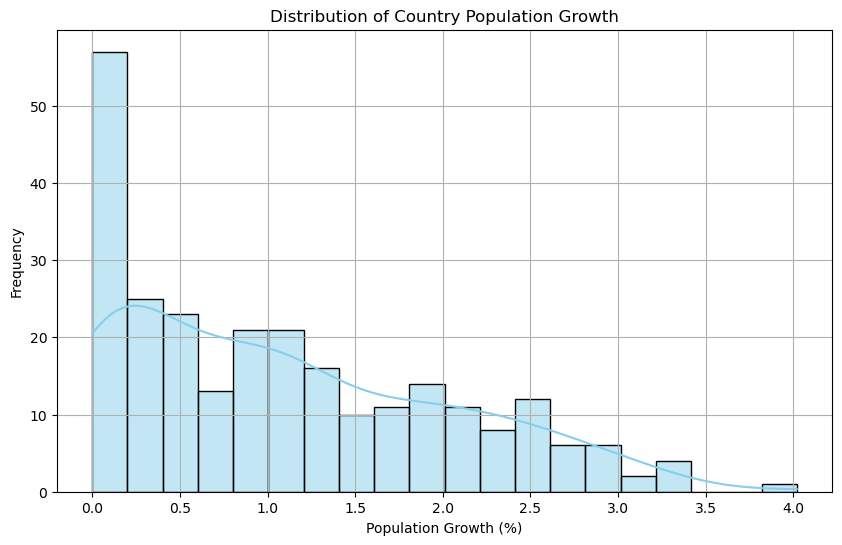

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Distribution of Population Growth
plt.figure(figsize=(10,6))
sns.histplot(df2['country_population_growth'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Country Population Growth')
plt.xlabel('Population Growth (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Here we see that the population growth for majority of countries is very less as compared to few countries who have the higher population growth

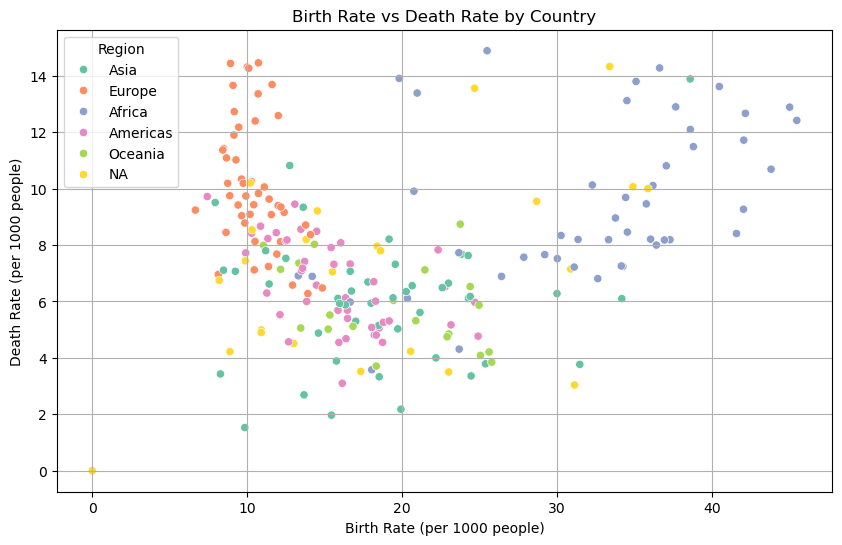

In [63]:
# Bivariate Analysis: Birth Rate vs Death Rate
plt.figure(figsize=(10,6))
sns.scatterplot(x='country_birth_rate', y='country_death_rate', data=df2, hue='country_region', palette='Set2')
plt.title('Birth Rate vs Death Rate by Country')
plt.xlabel('Birth Rate (per 1000 people)')
plt.ylabel('Death Rate (per 1000 people)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

As observed, regions with higher birth rates (e.g., parts of Africa and Asia) tend to have a higher overall demographic dynamic, whereas regions like Europe have relatively lower birth and death rates.

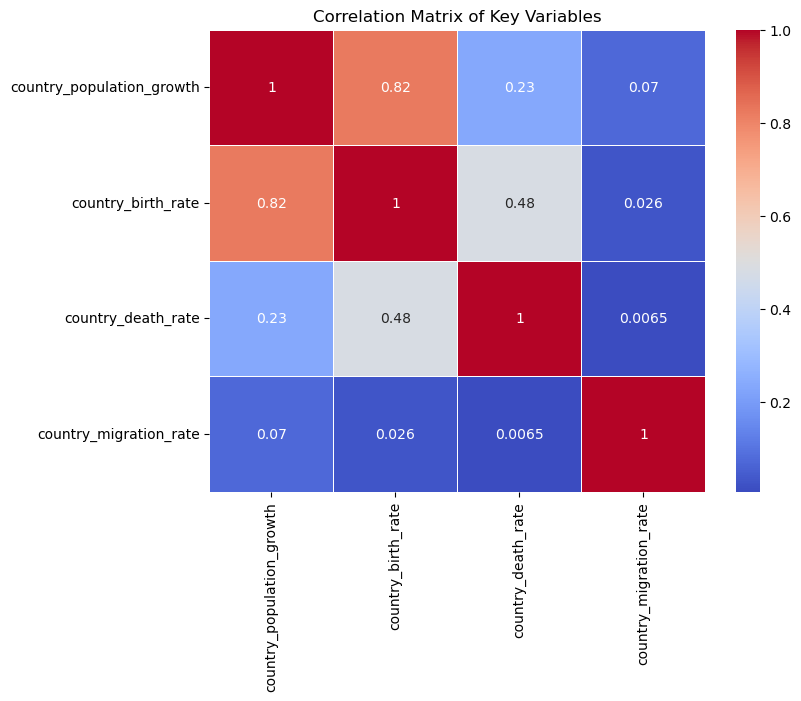

In [69]:
# Correlation Matrix Analysis
correlation_matrix = df2[['country_population_growth', 'country_birth_rate', 'country_death_rate', 'country_migration_rate']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

Population growth is primarily driven by birth rates rather than migration, and higher death rates slightly hinder population growth.

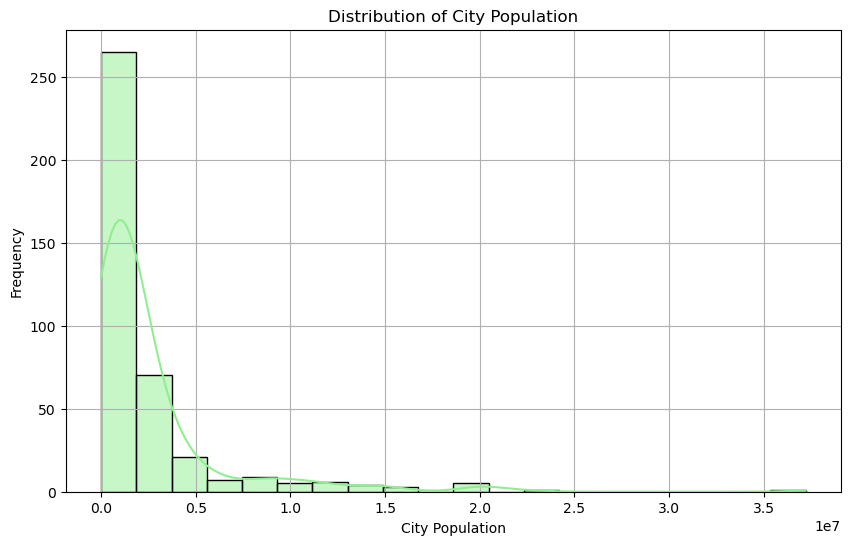

In [76]:
# Univariate Analysis: Distribution of City Population
plt.figure(figsize=(10,6))
sns.histplot(df3['city_population'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()